In [348]:
%matplotlib notebook
from modsim import *
import numpy as np
import pandas as pd
import operator as op

In [349]:
"""  Team 4

    h: heat transfer coefficient, 10 in this case, for static air cooling
    (related website: https://link.springer.com/article/10.1007/s00231-015-1652-x)
    k_f: the cryoscopic constant, For water, KF = 1.853 K·kg/mol;
    num_ions: the van 't Hoff factor (number of ion particles per individual molecule of solute, e.g. i = 2 for NaCl, 3 for BaCl2).
    (related website: https://en.wikipedia.org/wiki/Freezing-point_depression)
    
    max_soluability for NaCl: 35.65g/mol = 6.15 mole/kg
    A: 686.966 cm^2 = 0.0686966 m^2, surface area of a 500mL water bottle
    (related website: https://www.bottleyourbrand.com/answers/sizing/arrowhead-water-bottle-label-size
    
    T_init: -25Celsius, Initial Temperature of the water bottle, set in Northern Siberia
    (related website: https://en.wikipedia.org/wiki/Siberia)
    k_water: 0.0387
    (related_website: http://jwilson.coe.uga.edu/EMAT6680Fa2014/Gieseking/Exploration%2012/Newton%27s%20Law%20of%20Cooling.htm)
    k_ice: twice k_water
"""
k_f = 1.853 #K*Kg/mol
num_ions = 2 #Number of Ions in NaCl
A = 0.0686966
T_init = -25
T_env = 20
T_end = 4 #Temprature 
latent_heat = 334
#latent_heat=100
h = 10
k_water, k_ice = 0.0384, 0.0774
#k_water, k_ice = 0.01, 0.0392
molality_array = linspace(0, 6.147, 10)
freezing_point_array = 0 - molality_array * k_f * num_ions

r=.002
dt=1
freezing_point_array

array([  0.      ,  -2.531198,  -5.062396,  -7.593594, -10.124792,
       -12.65599 , -15.187188, -17.718386, -20.249584, -22.780782])

# Newton's cooling
The section below employs Newton's cooling to calculate temperature

In [350]:
ice = System(T_init=-25, T_env=20, T_end=4, k=k_ice, T=-25)
water = System(T_init=0, T_env=20, T_end=4, k=k_water, T=-25)

def newton_cooling(system, t):
    """Calculates the change in temperature over time"""
    #e=2.71828
    T=system.T
    #T = system.T_env + (system.T_init - system.T_env)*e**(-system.k*t)
    
    #system.T=T
    #return system.T
    T += -r * (system.T - T_env) * dt
    
    system.T = T
    
    return system.T

def run_simulation(system, t):
    results=TimeSeries()
    for i in range(t):
        x=newton_cooling(system, i)
        results[i]=x
    return results

run_simulation(ice, 50)

,value
0,-24.910000
1,-24.820180
2,-24.730540
3,-24.641079
4,-24.551796
5,-24.462693
6,-24.373767
7,-24.285020
8,-24.196450
9,-24.108057


<IPython.core.display.Javascript object>


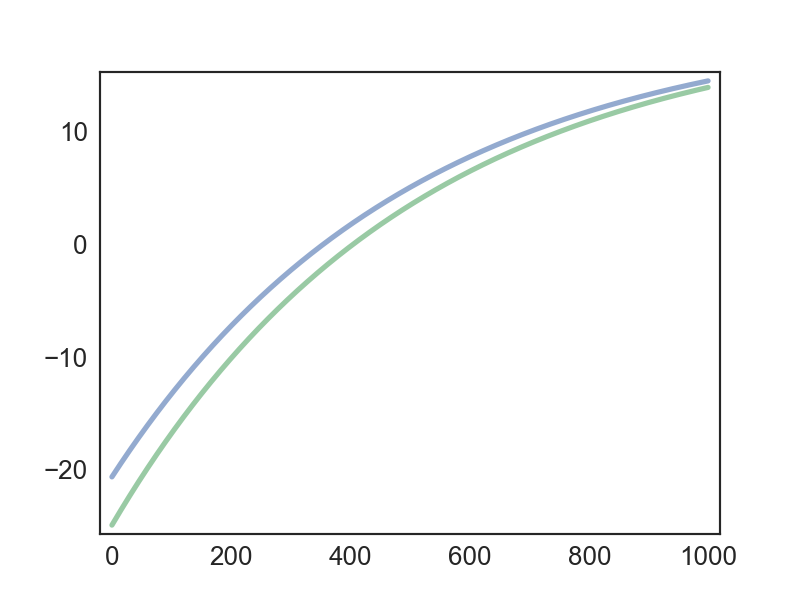

In [351]:
newfig()
def plot_results(system, t):
    y=run_simulation(system, t)
    plot(y)
    
plot_results(ice, 1000)
plot_results(water, 1000)

# Melting
The section below calculates the time it takes for water at each salt level to melt

In [352]:
def melting_at(T_fpt):
    dQ = 500 * latent_heat
    dt = dQ / (10 * A *(T_fpt - T_env))
    return -dt/60



In [353]:
def get_melting_time(freezing_point_array, update_func):
    arrary_length = len(freezing_point_array)
    sweep_fpt = TimeSeries()
    #sweep_fpt.columns('Time(s)')
    for i in range(0, arrary_length):
        sweep_fpt.loc[i+1] = update_func(freezing_point_array[i])
    return sweep_fpt

In [354]:
len(freezing_point_array)

10

In [355]:
get_melting_time(freezing_point_array, melting_at)

,value
1,202.581593
2,179.823188
3,161.661792
4,146.832336
5,134.494932
6,124.070097
7,115.145088
8,107.417954
9,100.662702
10,94.706821


In [356]:
results_in_minutes = get_melting_time(freezing_point_array, melting_at)
results_in_minutes


,value
1,202.581593
2,179.823188
3,161.661792
4,146.832336
5,134.494932
6,124.070097
7,115.145088
8,107.417954
9,100.662702
10,94.706821


<IPython.core.display.Javascript object>


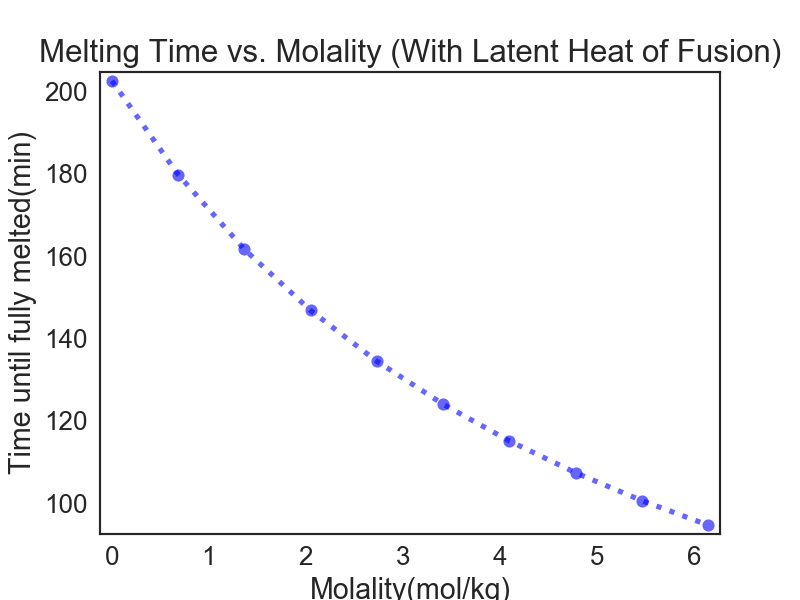

In [357]:
newfig()
plot(molality_array, results_in_minutes, 'bo:')
decorate(title='Melting Time vs. Molality (With Latent Heat of Fusion)',
         xlabel = 'Molality(mol/kg)',
         ylabel = 'Time until fully melted(min)',
         legend = False)

In [358]:
a = np.array(results_in_minutes)
np.diff(results_in_minutes)

array([-22.75840473, -18.16139585, -14.82945664, -12.33740352,
       -10.42483488,  -8.92500937,  -7.72713383,  -6.7552527 ,  -5.95588058])

In [359]:
results_in_minutes

,value
1,202.581593
2,179.823188
3,161.661792
4,146.832336
5,134.494932
6,124.070097
7,115.145088
8,107.417954
9,100.662702
10,94.706821


# Newton's Cooling(stop at Freezing Pts)

In [360]:
def run_simulation_ice(t, freezing_point_array):
    time2stop = TimeSeries()
    count=1
    temperature = DataFrame(columns = freezing_point_array)
    for freezing_pt in freezing_point_array:
        results=TimeSeries()
        recorded = False
        system = System(T_init=-25, T_env=20, T_end=4, k=k_ice, T=-25)
        for i in range(t):
            #print(str(freezing_pt)+"hello")
            x=newton_cooling(system, i)
            results[i] = x
            if x > freezing_pt and not recorded:
                print(freezing_pt)
                time2stop[count] = i
                recorded = True
                count+=1
        temperature[freezing_pt] = results
    return time2stop, temperature

In [361]:
#ice = System(T_init=-25, T_env=20, T_end=4, k=k_ice, T=-25)
%time time2stop_ice, temperature_solid = run_simulation_ice(1000, freezing_point_array)

0.0
-2.531198
-5.062396
-7.593594
-10.124792
-12.65599
-15.187188
-17.718386
-20.249584
-22.780782
Wall time: 5.37 s


In [362]:
#run_simulation_ice(ice, 100, freezing_point_array)
temperature_solid[:100]

,0.0,-2.531198,-5.062396,-7.593594,-10.124792,-12.65599,-15.187188,-17.718386,-20.249584,-22.780782
0,-24.910000,-24.910000,-24.910000,-24.910000,-24.910000,-24.910000,-24.910000,-24.910000,-24.910000,-24.910000
1,-24.820180,-24.820180,-24.820180,-24.820180,-24.820180,-24.820180,-24.820180,-24.820180,-24.820180,-24.820180
2,-24.730540,-24.730540,-24.730540,-24.730540,-24.730540,-24.730540,-24.730540,-24.730540,-24.730540,-24.730540
3,-24.641079,-24.641079,-24.641079,-24.641079,-24.641079,-24.641079,-24.641079,-24.641079,-24.641079,-24.641079
4,-24.551796,-24.551796,-24.551796,-24.551796,-24.551796,-24.551796,-24.551796,-24.551796,-24.551796,-24.551796
5,-24.462693,-24.462693,-24.462693,-24.462693,-24.462693,-24.462693,-24.462693,-24.462693,-24.462693,-24.462693
6,-24.373767,-24.373767,-24.373767,-24.373767,-24.373767,-24.373767,-24.373767,-24.373767,-24.373767,-24.373767
7,-24.285020,-24.285020,-24.285020,-24.285020,-24.285020,-24.285020,-24.285020,-24.285020,-24.285020,-24.285020
8,-24.196450,-24.196450,-24.196450,-24.196450,-24.196450,-24.196450,-24.196450,-24.196450,-24.196450,-24.196450
9,-24.108057,-24.108057,-24.108057,-24.108057,-24.108057,-24.108057,-24.108057,-24.108057,-24.108057,-24.108057


In [363]:
temperature_solid.columns = ['salt0', 'salt1', 'salt2', 'salt3', 'salt4', 'salt5', 'salt6', 'salt7', 'salt8', 'salt9']
temperature_solid
time2stop_ice

,value
1,405
2,345
3,292
4,244
5,200
6,160
7,122
8,88
9,55
10,25


# Liquid

In [364]:
def newton_cooling_above_freezing(system, t, freezing_pt):
    """Calculates the change in temperature over time"""
    #e=2.71828
    #T_init = freezing_pt
    #T=system.T
    #T = system.T_env + (T_init - system.T_env)*e**(-system.k*t)
    #system.T=T
    #return system.T
    '''if not assigned:
        T=freezing_pt
        assigned = True
    '''
    if t == 0:
        T = freezing_pt
        a = str(T)
        print("initial temp"+a)
    else:
        T = system.T
        print(T)
    T += -r * (T-T_env) * dt
    system.T = T
    return system.T

def run_simulation_water(system, t, freezing_point_array):
    time2stop = TimeSeries()
    count=1
    temperature = DataFrame(columns = freezing_point_array)
    for freezing_pt in freezing_point_array:
        results = TimeSeries()
        recorded = False
        assigned = False
        system = System(T_init=0, T_env=20, T_end=4, k=k_water, T=0)
        for i in range(t):
            x=newton_cooling_above_freezing(system, i, freezing_pt)
            results[i] = x
            if x > 4 and not recorded:
                time2stop[count] = i
                recorded = True
                count+=1
        temperature[freezing_pt] = results
    return time2stop, temperature


In [365]:
time2stop, temperature_liquid = run_simulation_water(water, 800, freezing_point_array)

initial temp0.0
0.04
0.07992
0.11976016
0.15952063968
0.199201598401
0.238803195204
0.278325588813
0.317768937636
0.357133399761
0.396419132961
0.435626294695
0.474755042106
0.513805532021
0.552777920957
0.591672365116
0.630489020385
0.669228042345
0.70788958626
0.746473807087
0.784980859473
0.823410897754
0.861764075959
0.900040547807
0.938240466711
0.976363985778
1.01441125781
1.05238243529
1.09027767042
1.12809711508
1.16584092085
1.20350923901
1.24110222053
1.27862001609
1.31606277606
1.3534306505
1.3907237892
1.42794234162
1.46508645694
1.50215628403
1.53915197146
1.57607366752
1.61292152018
1.64969567714
1.68639628579
1.72302349322
1.75957744623
1.79605829134
1.83246617475
1.8688012424
1.90506363992
1.94125351264
1.97737100561
2.0134162636
2.04938943108
2.08529065221
2.12112007091
2.15687783077
2.19256407511
2.22817894696
2.26372258906
2.29919514388
2.3345967536
2.36992756009
2.40518770497
2.44037732956
2.4754965749
2.51054558175
2.54552449059
2.5804334416
2.61527257472
2.6500420

14.7280595855
14.7386034663
14.7491262594
14.7596280068
14.7701087508
14.7805685333
14.7910073963
14.8014253815
14.8118225307
14.8221988856
14.8325544879
14.8428893789
14.8532036001
14.8634971929
14.8737701986
14.8840226582
14.8942546128
14.9044661036
14.9146571714
14.9248278571
14.9349782013
14.9451082449
14.9552180285
14.9653075924
14.9753769772
14.9854262233
14.9954553708
15.0054644601
15.0154535312
15.0254226241
15.0353717788
15.0453010353
15.0552104332
15.0651000123
15.0749698123
15.0848198727
15.094650233
15.1044609325
15.1142520106
15.1240235066
15.1337754596
15.1435079087
15.1532208929
15.1629144511
15.1725886222
15.1822434449
15.191878958
15.2014952001
15.2110922097
15.2206700253
15.2302286852
15.2397682279
15.2492886914
15.258790114
15.2682725338
15.2777359887
15.2871805168
15.2966061557
15.3060129434
15.3154009175
15.3247701157
15.3341205755
15.3434523343
15.3527654296
15.3620598988
15.371335779
15.3805931074
15.3898319212
15.3990522574
15.4082541529
15.4174376446
15.4266027

15.4034280102
15.4126211542
15.4217959119
15.4309523201
15.4400904155
15.4492102346
initial temp-5.062396
-5.012271208
-4.96224666558
-4.91232217225
-4.86249752791
-4.81277253285
-4.76314698779
-4.71362069381
-4.66419345242
-4.61486506552
-4.56563533539
-4.51650406472
-4.46747105659
-4.41853611447
-4.36969904225
-4.32095964416
-4.27231772487
-4.22377308942
-4.17532554324
-4.12697489216
-4.07872094237
-4.03056350049
-3.98250237349
-3.93453736874
-3.886668294
-3.83889495741
-3.7912171675
-3.74363473317
-3.6961474637
-3.64875516877
-3.60145765843
-3.55425474312
-3.50714623363
-3.46013194116
-3.41321167728
-3.36638525393
-3.31965248342
-3.27301317845
-3.2264671521
-3.18001421779
-3.13365418936
-3.08738688098
-3.04121210721
-2.995129683
-2.94913942363
-2.90324114479
-2.8574346625
-2.81171979317
-2.76609635359
-2.72056416088
-2.67512303256
-2.62977278649
-2.58451324092
-2.53934421444
-2.49426552601
-2.44927699496
-2.40437844097
-2.35956968408
-2.31485054472
-2.27022084363
-2.22568040194
-2.1

1.47381544236
1.51086781147
1.54784607585
1.5847503837
1.62158088293
1.65833772117
1.69502104572
1.73163100363
1.76816774162
1.80463140614
1.84102214333
1.87734009904
1.91358541884
1.94975824801
1.98585873151
2.02188701405
2.05784324002
2.09372755354
2.12954009843
2.16528101824
2.2009504562
2.23654855529
2.27207545818
2.30753130726
2.34291624465
2.37823041216
2.41347395133
2.44864700343
2.48374970942
2.51878221
2.55374464558
2.58863715629
2.62345988198
2.65821296222
2.69289653629
2.72751074322
2.76205572173
2.79653161029
2.83093854707
2.86527666997
2.89954611663
2.9337470244
2.96787953035
3.00194377129
3.03593988375
3.06986800398
3.10372826797
3.13752081144
3.17124576981
3.20490327827
3.23849347172
3.27201648477
3.30547245181
3.3388615069
3.37218378389
3.40543941632
3.43862853749
3.47175128041
3.50480777785
3.5377981623
3.57072256597
3.60358112084
3.6363739586
3.66910121068
3.70176300826
3.73435948224
3.76689076328
3.79935698175
3.83175826779
3.86409475125
3.89636656175
3.92857382863
3

3.24391116564
3.27742334331
3.31086849662
3.34424675963
3.37755826611
3.41080314958
3.44398154328
3.47709358019
3.51013939303
3.54311911425
3.57603287602
3.60888081027
3.64166304865
3.67437972255
3.7070309631
3.73961690118
3.77213766737
3.80459339204
3.83698420526
3.86931023684
3.90157161637
3.93376847314
3.96590093619
3.99796913432
4.02997319605
4.06191324966
4.09378942316
4.12560184431
4.15735064062
4.18903593934
4.22065786746
4.25221655173
4.28371211863
4.31514469439
4.346514405
4.37782137619
4.40906573344
4.44024760197
4.47136710677
4.50242437255
4.53341952381
4.56435268476
4.59522397939
4.62603353143
4.65678146437
4.68746790144
4.71809296564
4.74865677971
4.77915946615
4.80960114722
4.83998194492
4.87030198103
4.90056137707
4.93076025431
4.96089873381
4.99097693634
5.02099498247
5.0509529925
5.08085108652
5.11068938434
5.14046800557
5.17018706956
5.19984669542
5.22944700203
5.25898810803
5.28847013181
5.31789319155
5.34725740517
5.37656289036
5.40580976458
5.43499814505
5.46412814

-3.56356974569
-3.5164426062
-3.46940972099
-3.42247090155
-3.37562595974
-3.32887470782
-3.28221695841
-3.23565252449
-3.18918121944
-3.142802857
-3.09651725129
-3.05032421679
-3.00422356835
-2.95821512122
-2.91229869097
-2.86647409359
-2.8207411454
-2.77509966311
-2.72954946379
-2.68409036486
-2.63872218413
-2.59344473976
-2.54825785028
-2.50316133458
-2.45815501191
-2.41323870189
-2.36841222448
-2.32367540004
-2.27902804924
-2.23446999314
-2.19000105315
-2.14562105104
-2.10132980894
-2.05712714932
-2.01301289503
-1.96898686924
-1.9250488955
-1.88119879771
-1.83743640011
-1.79376152731
-1.75017400426
-1.70667365625
-1.66326030893
-1.61993378832
-1.57669392074
-1.5335405329
-1.49047345183
-1.44749250493
-1.40459751992
-1.36178832488
-1.31906474823
-1.27642661873
-1.2338737655
-1.19140601797
-1.14902320593
-1.10672515952
-1.0645117092
-1.02238268578
-0.980337920408
-0.938377244568
-0.896500490078
-0.854707489098
-0.81299807412
-0.771372077972
-0.729829333816
-0.688369675148
-0.64699293

0.506301661235
0.545289057912
0.584198479797
0.623030082837
0.661784022671
0.700460454626
0.739059533717
0.777581414649
0.81602625182
0.854394199316
0.892685410918
0.930900040096
0.969038240016
1.00710016354
1.04508596321
1.08299579128
1.1208297997
1.1585881401
1.19627096382
1.23387842189
1.27141066505
1.30886784372
1.34625010803
1.38355760782
1.4207904926
1.45794891161
1.49503301379
1.53204294776
1.56897886187
1.60584090414
1.64262922234
1.67934396389
1.71598527596
1.75255330541
1.7890481988
1.8254701024
1.8618191622
1.89809552387
1.93429933283
1.97043073416
2.00648987269
2.04247689295
2.07839193916
2.11423515528
2.15000668497
2.1857066716
2.22133525826
2.25689258774
2.29237880257
2.32779404496
2.36313845687
2.39841217996
2.4336153556
2.46874812489
2.50381062864
2.53880300738
2.57372540137
2.60857795056
2.64336079466
2.67807407307
2.71271792493
2.74729248908
2.7817979041
2.81623430829
2.85060183967
2.88490063599
2.91913083472
2.95329257305
2.98738598791
3.02141121593
3.0553683935
3.08

4.21158400701
4.24316083899
4.27467451731
4.30612516828
4.33751291794
4.36883789211
4.40010021632
4.43130001589
4.46243741586
4.49351254103
4.52452551594
4.55547646491
4.58636551198
4.61719278096
4.6479583954
4.67866247861
4.70930515365
4.73988654334
4.77040677026
4.80086595671
4.8312642248
4.86160169635
4.89187849296
4.92209473597
4.9522505465
4.98234604541
5.01238135332
5.04235659061
5.07227187743
5.10212733367
5.13192307901
5.16165923285
5.19133591438
5.22095324255
5.25051133607
5.2800103134
5.30945029277
5.33883139219
5.3681537294
5.39741742194
5.4266225871
5.45576934192
5.48485780324
5.51388808763
5.54286031146
5.57177459084
5.60063104165
5.62942977957
5.65817092001
5.68685457817
5.71548086901
5.74404990728
5.77256180746
5.80101668385
5.82941465048
5.85775582118
5.88604030954
5.91426822892
5.94243969246
5.97055481307
5.99861370345
6.02661647604
6.05456324309
6.0824541166
6.11028920837
6.13806862995
6.16579249269
6.19346090771
6.22107398589
6.24863183792
6.27613457424
6.3035823051


9.51701073202
9.53797671056
9.55890075714
9.57978295562
9.60062338971
9.62142214293
9.64217929865
9.66289494005
9.68356915017
9.70420201187
9.72479360784
9.74534402063
9.76585333259
9.78632162592
9.80674898267
9.8271354847
9.84748121374
9.86778625131
9.88805067881
9.90827457745
9.92845802829
9.94860111224
9.96870391001
9.98876650219
10.0087889692
10.0287713912
10.0487138485
10.0686164208
10.0884791879
10.1083022296
10.1280856251
10.1478294538
10.1675337949
10.1871987273
10.2068243299
10.2264106812
10.2459578599
10.2654659441
10.2849350123
10.3043651422
10.323756412
10.3431088991
10.3624226813
10.381697836
10.4009344403
10.4201325714
10.4392923063
10.4584137217
10.4774968942
10.4965419004
10.5155488166
10.534517719
10.5534486836
10.5723417862
10.5911971026
10.6100147084
10.628794679
10.6475370896
10.6662420155
10.6849095314
10.7035397124
10.7221326329
10.7406883677
10.7592069909
10.777688577
10.7961331998
10.8145409334
10.8329118515
10.8512460278
10.8695435358
10.8878044487
10.906028839

In [366]:
#run_simulation_water(water, 1000, freezing_point_array)
time2stop

,value
1,111
2,170
3,224
4,272
5,316
6,356
7,393
8,428
9,460
10,491


In [367]:
def onerun(system3, t, numrun, freezing_pt):
    """Calculates data points for one run of the simulation for one level of salt.
    
    system1=ice system
    system2=latent heat system
    system3=water system
    t=amount of time running the array
    numrun=run number corresponding with appropriate salt level (between 0 and 10)
    freezing_pt=the temperature of the freezing point that corresponds with the level of salt.
    """
    below=time2stop_ice[numrun]
    middle=time2stop_ice[numrun] + results_in_minutes[numrun]
    high=time2stop_ice[numrun] + results_in_minutes[numrun] + time2stop[numrun]
    #freezing_pt = freezing_point_array[numrun]
    print(below, middle, high)
    plotpoints=TimeSeries()
    system1 = System(T_init=-25, T_env=20, T_end=4, k=k_ice, T=-25)
    system3 = System(T_init=-25, T_env=20, T_end=4, k=k_water, T=freezing_pt)
    for i in range(t):
        if i<= below:
            plotpoints[i] = newton_cooling(system1, i)
        elif i>below and i<=middle:
            plotpoints[i] = freezing_pt #the corresponding freezing temperature
        elif i > middle and i <= high:
            check= newton_cooling_above_freezing(system3, (i-middle), freezing_pt)
            plotpoints[i] = check
            if check > 4:
                break
        else:
            break
    return plotpoints    

In [368]:

onerun(water, 10000, 1, 0)


405 607.581593073 718.581593073
0.0
0.04
0.07992
0.11976016
0.15952063968
0.199201598401
0.238803195204
0.278325588813
0.317768937636
0.357133399761
0.396419132961
0.435626294695
0.474755042106
0.513805532021
0.552777920957
0.591672365116
0.630489020385
0.669228042345
0.70788958626
0.746473807087
0.784980859473
0.823410897754
0.861764075959
0.900040547807
0.938240466711
0.976363985778
1.01441125781
1.05238243529
1.09027767042
1.12809711508
1.16584092085
1.20350923901
1.24110222053
1.27862001609
1.31606277606
1.3534306505
1.3907237892
1.42794234162
1.46508645694
1.50215628403
1.53915197146
1.57607366752
1.61292152018
1.64969567714
1.68639628579
1.72302349322
1.75957744623
1.79605829134
1.83246617475
1.8688012424
1.90506363992
1.94125351264
1.97737100561
2.0134162636
2.04938943108
2.08529065221
2.12112007091
2.15687783077
2.19256407511
2.22817894696
2.26372258906
2.29919514388
2.3345967536
2.36992756009
2.40518770497
2.44037732956
2.4754965749
2.51054558175
2.54552449059
2.5804334416
2.6

,value
0,-24.910000
1,-24.820180
2,-24.730540
3,-24.641079
4,-24.551796
5,-24.462693
6,-24.373767
7,-24.285020
8,-24.196450
9,-24.108057


<IPython.core.display.Javascript object>


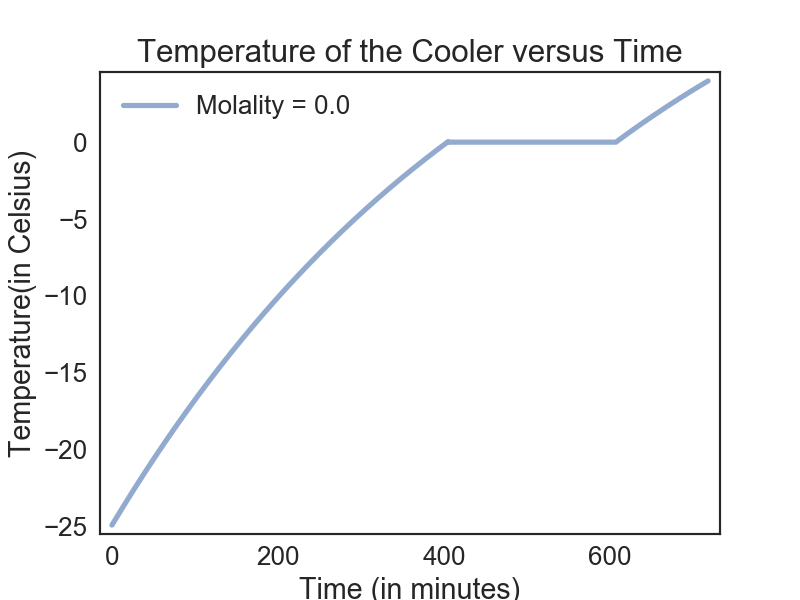

405 607.581593073 718.581593073
0.0
0.04
0.07992
0.11976016
0.15952063968
0.199201598401
0.238803195204
0.278325588813
0.317768937636
0.357133399761
0.396419132961
0.435626294695
0.474755042106
0.513805532021
0.552777920957
0.591672365116
0.630489020385
0.669228042345
0.70788958626
0.746473807087
0.784980859473
0.823410897754
0.861764075959
0.900040547807
0.938240466711
0.976363985778
1.01441125781
1.05238243529
1.09027767042
1.12809711508
1.16584092085
1.20350923901
1.24110222053
1.27862001609
1.31606277606
1.3534306505
1.3907237892
1.42794234162
1.46508645694
1.50215628403
1.53915197146
1.57607366752
1.61292152018
1.64969567714
1.68639628579
1.72302349322
1.75957744623
1.79605829134
1.83246617475
1.8688012424
1.90506363992
1.94125351264
1.97737100561
2.0134162636
2.04938943108
2.08529065221
2.12112007091
2.15687783077
2.19256407511
2.22817894696
2.26372258906
2.29919514388
2.3345967536
2.36992756009
2.40518770497
2.44037732956
2.4754965749
2.51054558175
2.54552449059
2.5804334416
2.6

In [369]:
def plot_onerun(t, numrun, freezing_pt):
    """numrun=run number, starts at 0 with 0 degrees celsius and no salt
    freezing_point_array[x]= the temperature corresponding with the salt level. STARTS AT 0 WITH NO SALT."""
    x=onerun(water, t, numrun, freezing_pt)
    x_label ="Molality = " + str(molality_array[numrun-1])
    plot(x, label = x_label)
    decorate(title='Temperature of the Cooler versus Time',
             xlabel='Time (in minutes)', ylabel='Temperature(in Celsius)', legend=True)
    legend(loc='best', labelspacing=0.2)
newfig()
plot_onerun(1000, 1, freezing_point_array[0])

In [370]:
def plot_allruns(t, freezing_point_array):
    array_length = len(freezing_point_array)
    for i in range(array_length):
        plot_onerun(t, i+1, freezing_point_array[i])

<IPython.core.display.Javascript object>


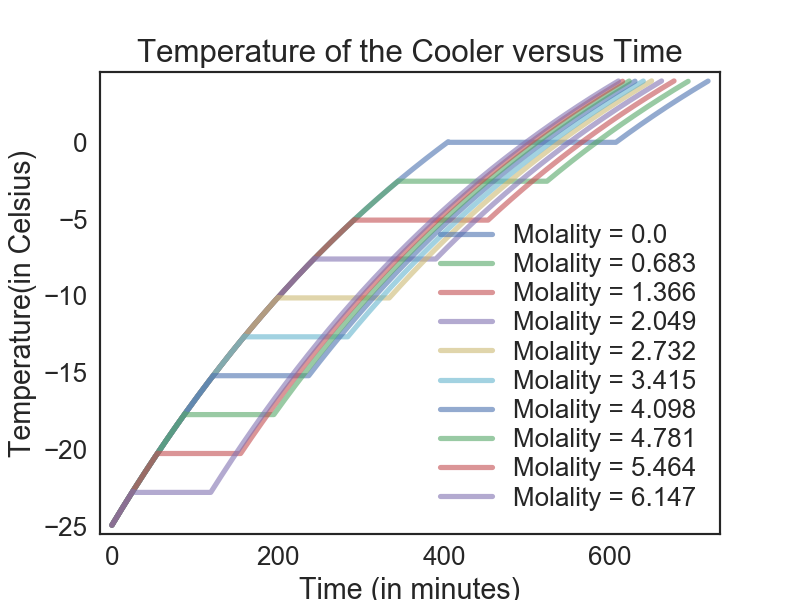

405 607.581593073 718.581593073
0.0
0.04
0.07992
0.11976016
0.15952063968
0.199201598401
0.238803195204
0.278325588813
0.317768937636
0.357133399761
0.396419132961
0.435626294695
0.474755042106
0.513805532021
0.552777920957
0.591672365116
0.630489020385
0.669228042345
0.70788958626
0.746473807087
0.784980859473
0.823410897754
0.861764075959
0.900040547807
0.938240466711
0.976363985778
1.01441125781
1.05238243529
1.09027767042
1.12809711508
1.16584092085
1.20350923901
1.24110222053
1.27862001609
1.31606277606
1.3534306505
1.3907237892
1.42794234162
1.46508645694
1.50215628403
1.53915197146
1.57607366752
1.61292152018
1.64969567714
1.68639628579
1.72302349322
1.75957744623
1.79605829134
1.83246617475
1.8688012424
1.90506363992
1.94125351264
1.97737100561
2.0134162636
2.04938943108
2.08529065221
2.12112007091
2.15687783077
2.19256407511
2.22817894696
2.26372258906
2.29919514388
2.3345967536
2.36992756009
2.40518770497
2.44037732956
2.4754965749
2.51054558175
2.54552449059
2.5804334416
2.6

2.79653161029
2.83093854707
2.86527666997
2.89954611663
2.9337470244
2.96787953035
3.00194377129
3.03593988375
3.06986800398
3.10372826797
3.13752081144
3.17124576981
3.20490327827
3.23849347172
3.27201648477
3.30547245181
3.3388615069
3.37218378389
3.40543941632
3.43862853749
3.47175128041
3.50480777785
3.5377981623
3.57072256597
3.60358112084
3.6363739586
3.66910121068
3.70176300826
3.73435948224
3.76689076328
3.79935698175
3.83175826779
3.86409475125
3.89636656175
3.92857382863
3.96071668097
200 334.494932329 650.494932329
-10.124792
-10.064542416
-10.0044133312
-9.94440450451
-9.8845156955
-9.82474666411
-9.76509717078
-9.70556697644
-9.64615584248
-9.5868635308
-9.52768980374
-9.46863442413
-9.40969715528
-9.35087776097
-9.29217600545
-9.23359165344
-9.17512447013
-9.11677422119
-9.05854067275
-9.0004235914
-8.94242274422
-8.88453789873
-8.82676882293
-8.76911528529
-8.71157705472
-8.65415390061
-8.59684559281
-8.53965190162
-8.48257259782
-8.42560745262
-8.36875623772
-8.31201872

3.36758670177
3.40085152836
3.43404982531
3.46718172565
3.5002473622
3.53324686748
3.56618037374
3.599048013
3.63184991697
3.66458621714
3.6972570447
3.72986253061
3.76240280555
3.79487799994
3.82728824394
3.85963366745
3.89191440012
3.92413057132
3.95628231017
122 237.145088077 630.145088077
-15.187188
-15.116813624
-15.0465799968
-14.9764868368
-14.9065338631
-14.8367207954
-14.7670473538
-14.6975132591
-14.6281182325
-14.5588619961
-14.4897442721
-14.4207647835
-14.351923254
-14.2832194075
-14.2146529687
-14.1462236627
-14.0779312154
-14.009775353
-13.9417558023
-13.8738722906
-13.8061245461
-13.738512297
-13.6710352724
-13.6036932018
-13.5364858154
-13.4694128438
-13.4024740181
-13.3356690701
-13.2689977319
-13.2024597365
-13.136054817
-13.0697827074
-13.003643142
-12.9376358557
-12.871760584
-12.8060170628
-12.7404050287
-12.6749242186
-12.6095743702
-12.5443552214
-12.479266511
-12.414307978
-12.349479362
-12.2847804033
-12.2202108425
-12.1557704208
-12.0914588799
-12.0272759622


-3.23507572388
-3.18860557244
-3.14222836129
-3.09594390457
-3.04975201676
-3.00365251273
-2.9576452077
-2.91172991729
-2.86590645745
-2.82017464454
-2.77453429525
-2.72898522666
-2.6835272562
-2.63816020169
-2.59288388129
-2.54769811353
-2.5026027173
-2.45759751186
-2.41268231684
-2.36785695221
-2.3231212383
-2.27847499583
-2.23391804583
-2.18945020974
-2.14507130932
-2.1007811667
-2.05657960437
-2.01246644516
-1.96844151227
-1.92450462925
-1.88065561999
-1.83689430875
-1.79322052013
-1.74963407909
-1.70613481093
-1.66272254131
-1.61939709623
-1.57615830204
-1.53300598543
-1.48993997346
-1.44696009351
-1.40406617333
-1.36125804098
-1.3185355249
-1.27589845385
-1.23334665694
-1.19087996363
-1.1484982037
-1.10620120729
-1.06398880488
-1.02186082727
-0.979817105613
-0.937857471402
-0.895981756459
-0.854189792946
-0.81248141336
-0.770856450534
-0.729314737633
-0.687856108157
-0.646480395941
-0.605187435149
-0.563977060279
-0.522849106158
-0.481803407946
-0.44083980113
-0.399958121528
-0.3

In [371]:
newfig()
plot_allruns(1200, freezing_point_array)

In [372]:
temperature_liquid.columns = ['salt0', 'salt1', 'salt2', 'salt3', 'salt4', 'salt5', 'salt6', 'salt7', 'salt8', 'salt9']
temperature_liquid

,salt0,salt1,salt2,salt3,salt4,salt5,salt6,salt7,salt8,salt9
0,0.040000,-2.486136,-5.012271,-7.538407,-10.064542,-12.590678,-15.116814,-17.642949,-20.169085,-22.695220
1,0.079920,-2.441163,-4.962247,-7.483330,-10.004413,-12.525497,-15.046580,-17.567663,-20.088747,-22.609830
2,0.119760,-2.396281,-4.912322,-7.428363,-9.944405,-12.460446,-14.976487,-17.492528,-20.008569,-22.524610
3,0.159521,-2.351488,-4.862498,-7.373507,-9.884516,-12.395525,-14.906534,-17.417543,-19.928552,-22.439561
4,0.199202,-2.306785,-4.812773,-7.318760,-9.824747,-12.330734,-14.836721,-17.342708,-19.848695,-22.354682
5,0.238803,-2.262172,-4.763147,-7.264122,-9.765097,-12.266072,-14.767047,-17.268022,-19.768998,-22.269973
6,0.278326,-2.217648,-4.713621,-7.209594,-9.705567,-12.201540,-14.697513,-17.193486,-19.689460,-22.185433
7,0.317769,-2.173212,-4.664193,-7.155175,-9.646156,-12.137137,-14.628118,-17.119099,-19.610081,-22.101062
8,0.357133,-2.128866,-4.614865,-7.100864,-9.586864,-12.072863,-14.558862,-17.044861,-19.530860,-22.016860
9,0.396419,-2.084608,-4.565635,-7.046663,-9.527690,-12.008717,-14.489744,-16.970772,-19.451799,-21.932826


In [373]:
sum_time = results_in_minutes + time2stop + time2stop_ice
sum_time

1     718.581593
2     694.823188
3     677.661792
4     662.832336
5     650.494932
6     640.070097
7     630.145088
8     623.417954
9     615.662702
10    610.706821
dtype: float64

<IPython.core.display.Javascript object>


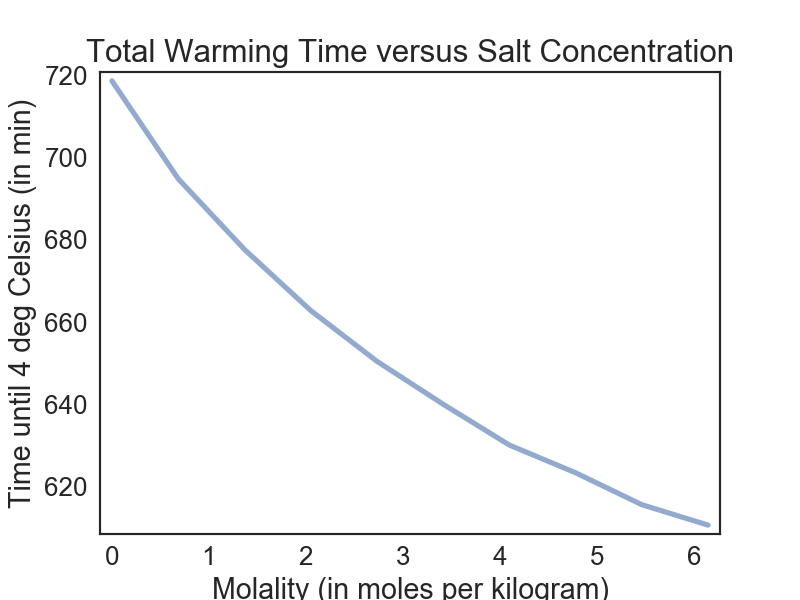

In [374]:
newfig()
plot(molality_array, sum_time)
decorate(title='Total Warming Time versus Salt Concentration', 
         xlabel='Molality (in moles per kilogram)', 
         ylabel='Time until 4 deg Celsius (in min)', 
         legend=False)